# Exploring Heart Failure Prediction Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\vamsi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vamsi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\vamsi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# Checking for missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No missing values in this data set

# Exploratory Data Analysis

### Let's look at categorical variables first

1    194
0    105
Name: sex, dtype: int64


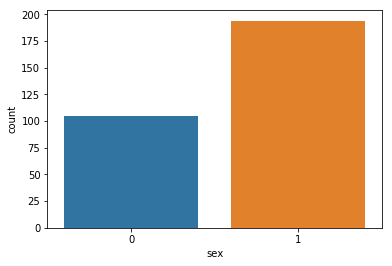

In [34]:
print(df['sex'].value_counts())
sns.countplot('sex', data = df)

There is almost a 2:1 ratio of men to women with 194 men to 105 women. 

In [35]:
print(df['anaemia'].value_counts())

0    170
1    129
Name: anaemia, dtype: int64


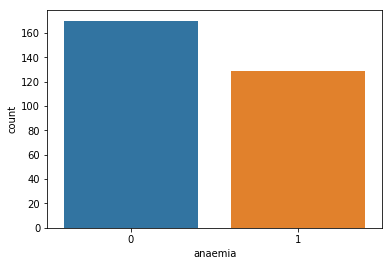

In [36]:
sns.countplot('anaemia', data = df)

0    174
1    125
Name: diabetes, dtype: int64


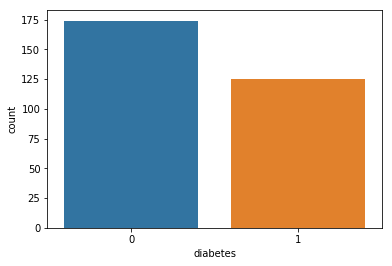

In [39]:
print(df['diabetes'].value_counts())
sns.countplot('diabetes', data = df)

0    194
1    105
Name: high_blood_pressure, dtype: int64


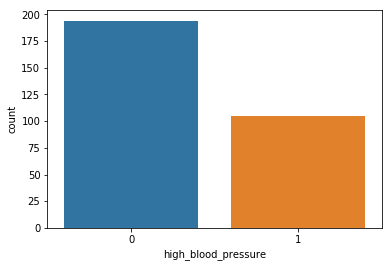

In [40]:
print(df['high_blood_pressure'].value_counts())
sns.countplot('high_blood_pressure', data = df)

0    203
1     96
Name: smoking, dtype: int64


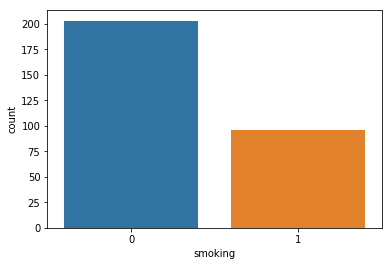

In [41]:
print(df['smoking'].value_counts())
sns.countplot('smoking', data = df)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


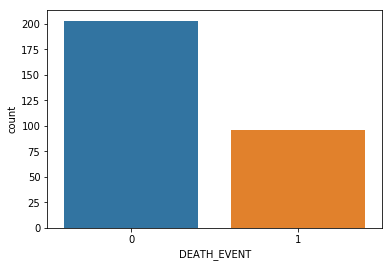

In [42]:
print(df['DEATH_EVENT'].value_counts())
sns.countplot('DEATH_EVENT', data = df)

Most people survived to the end of the follow-up period. 96 died during this period out of 299. 

## Looking into the response (DEATH_EVENT)

We explore the relationship between survival/death and the various categorical features to see if there are any patterns. 

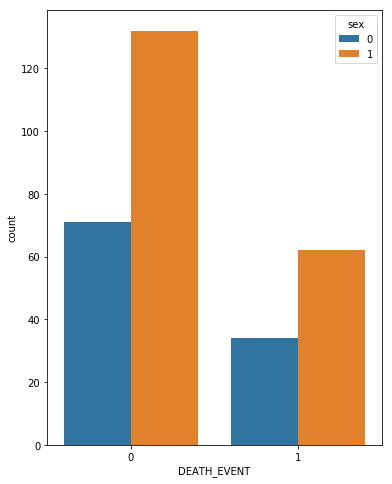

In [44]:
plt.figure(figsize= (6, 8))
sns.countplot('DEATH_EVENT', data = df, hue='sex')

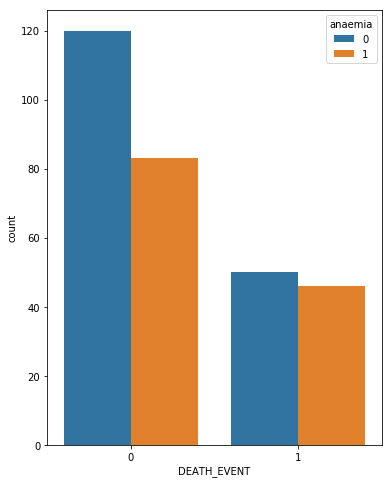

In [50]:
plt.figure(figsize= (6, 8))
sns.countplot('DEATH_EVENT', data = df, hue='anaemia')

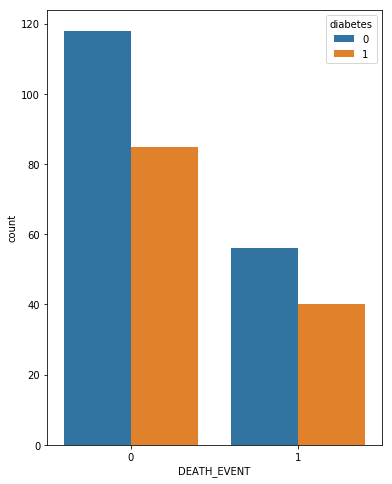

In [51]:
plt.figure(figsize= (6, 8))
sns.countplot('DEATH_EVENT', data = df, hue='diabetes')

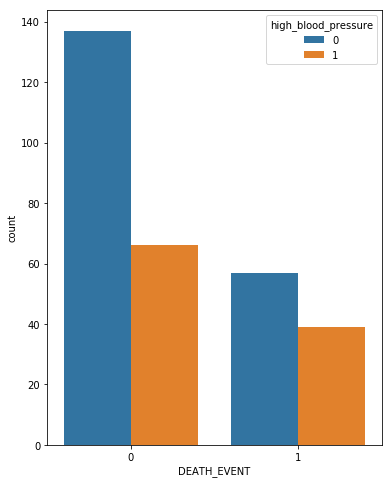

In [52]:
plt.figure(figsize= (6, 8))
sns.countplot('DEATH_EVENT', data = df, hue='high_blood_pressure')

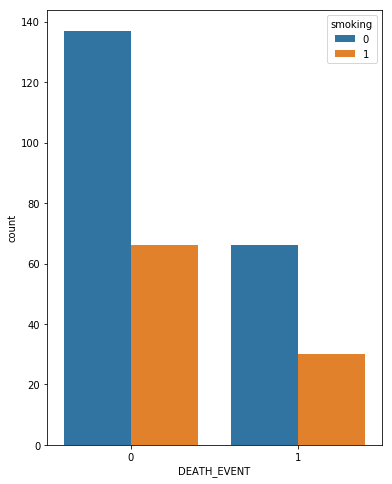

In [53]:
plt.figure(figsize= (6, 8))
sns.countplot('DEATH_EVENT', data = df, hue='smoking')

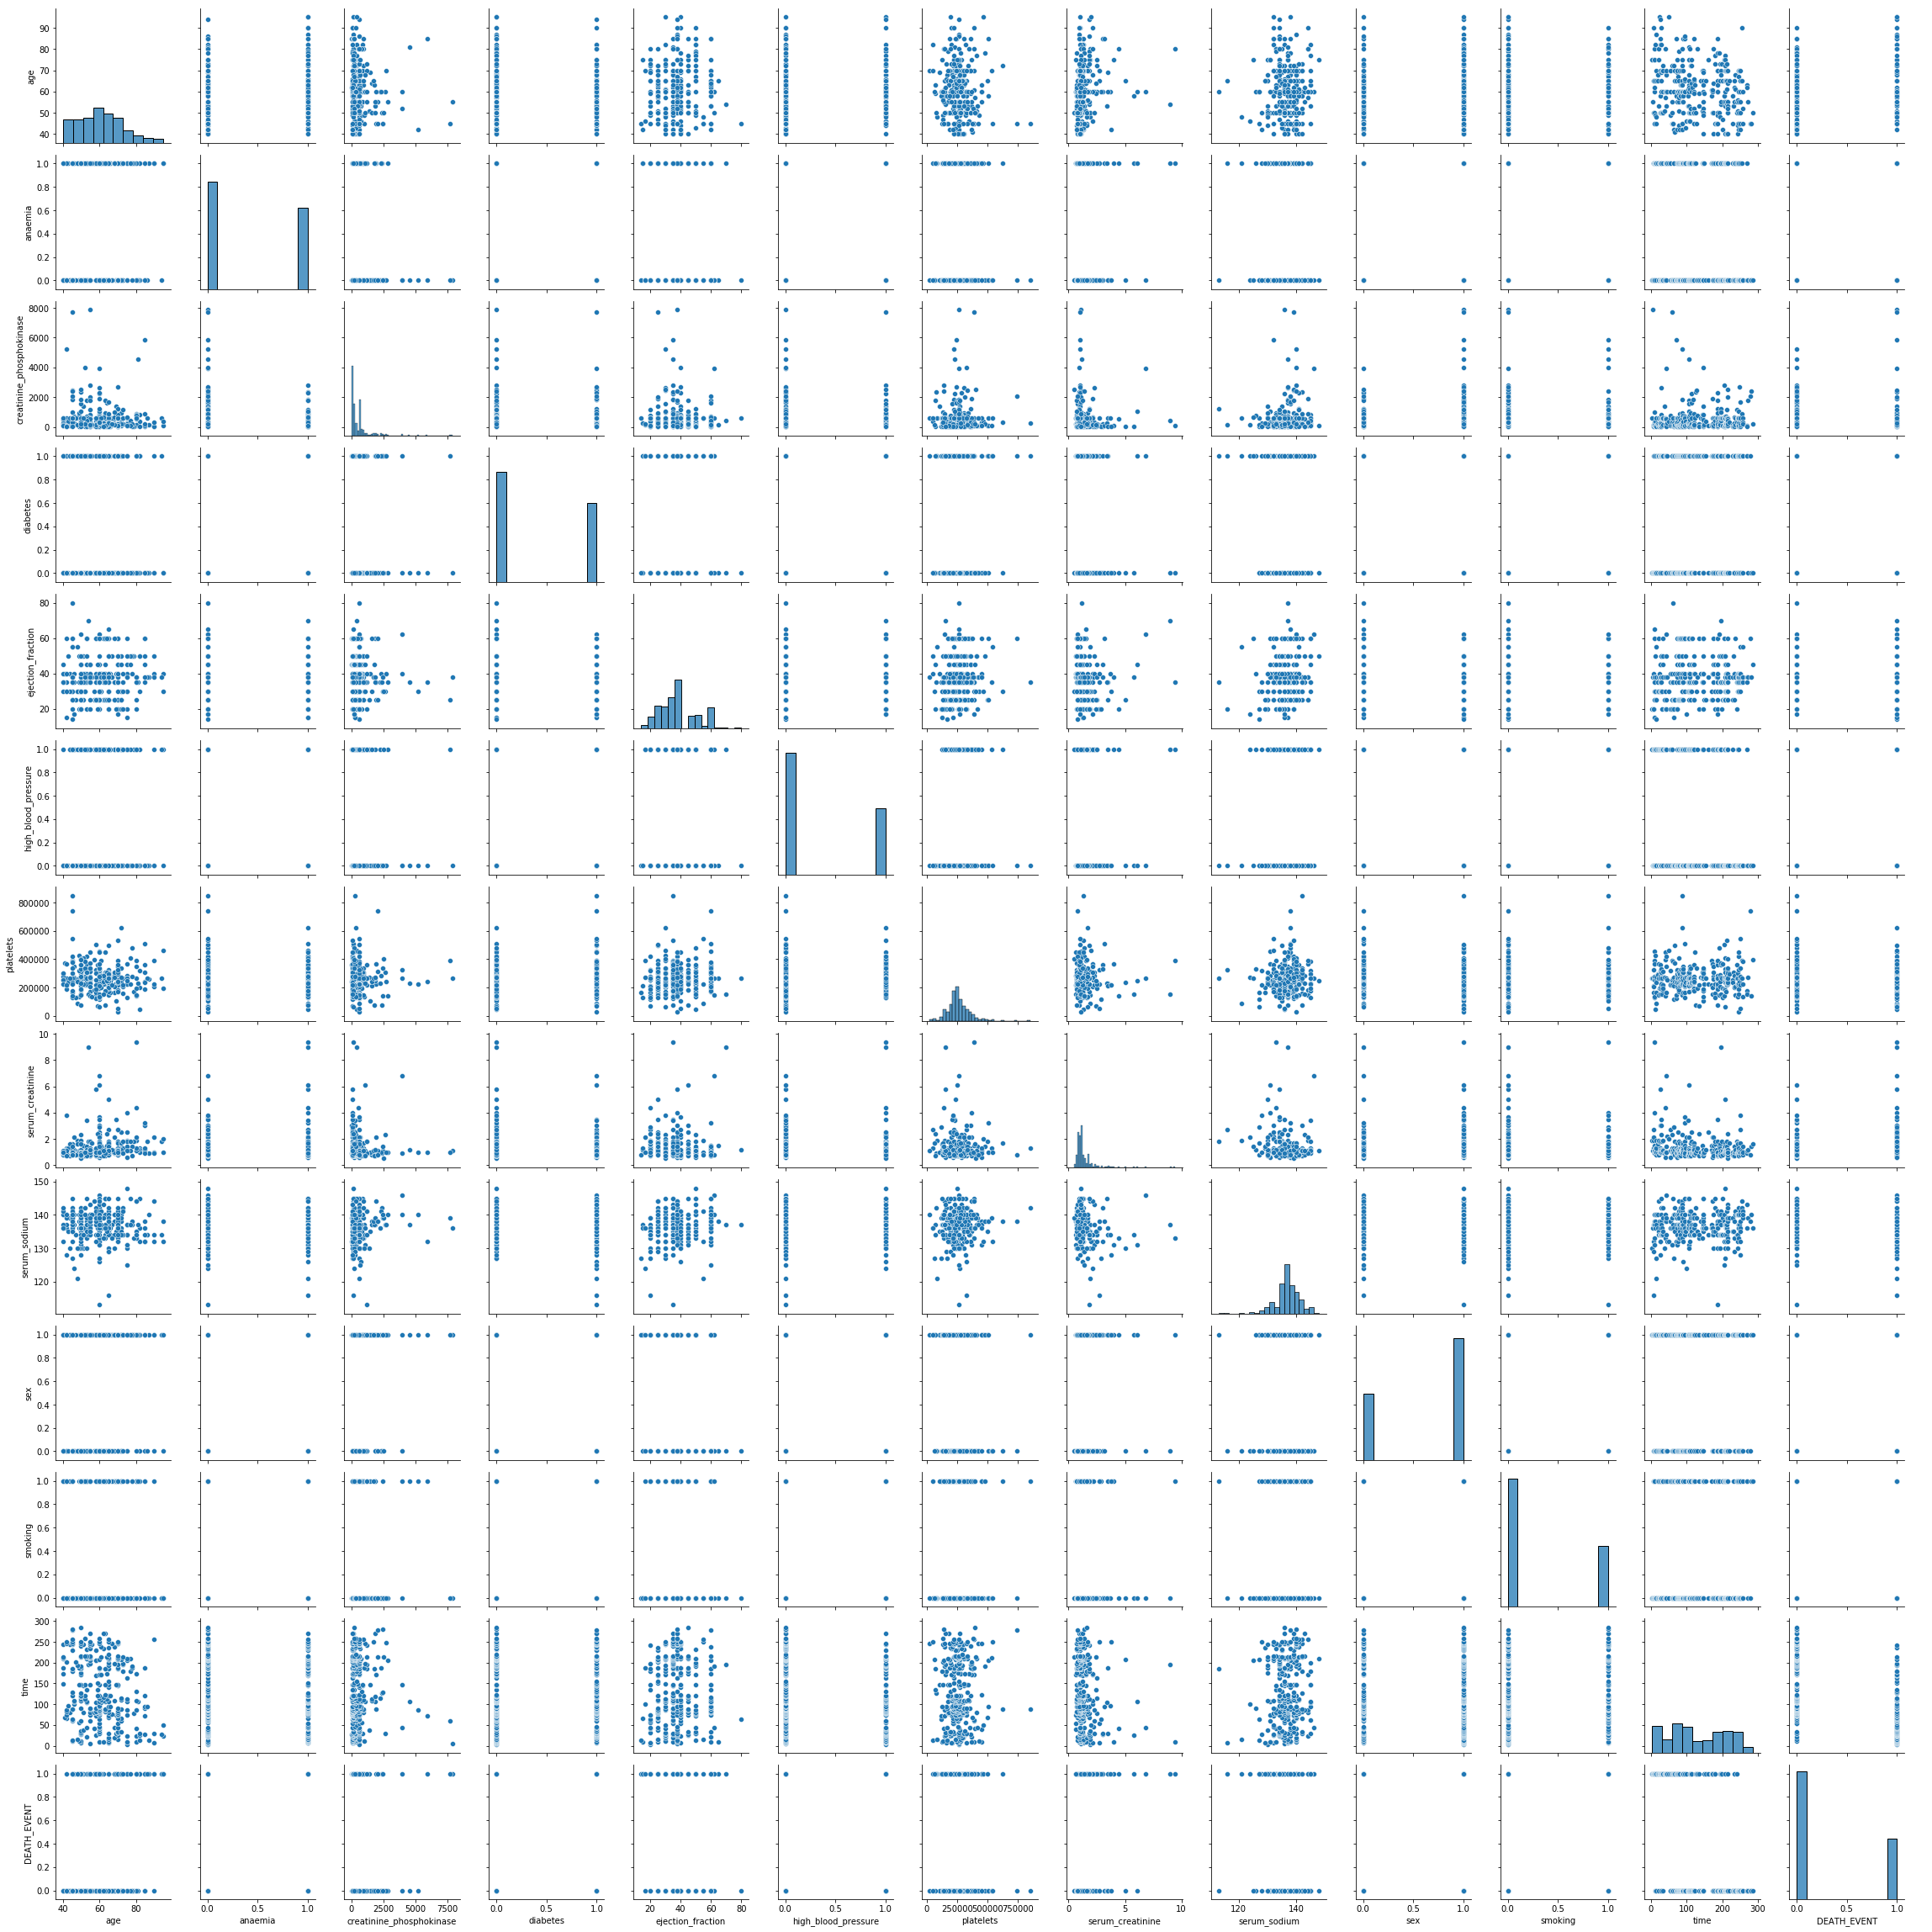

In [54]:
sns.pairplot(df)

## Let us look at some continuous variables

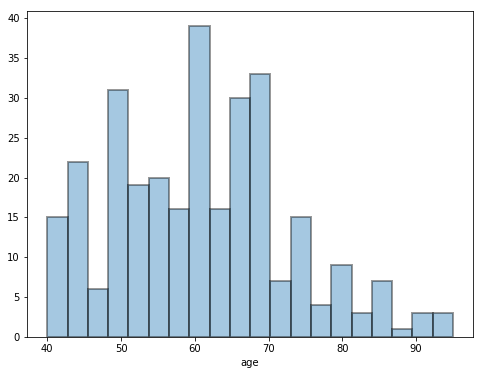

In [70]:
plt.figure(figsize= (8, 6))
sns.distplot(df['age'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2), kde = False)

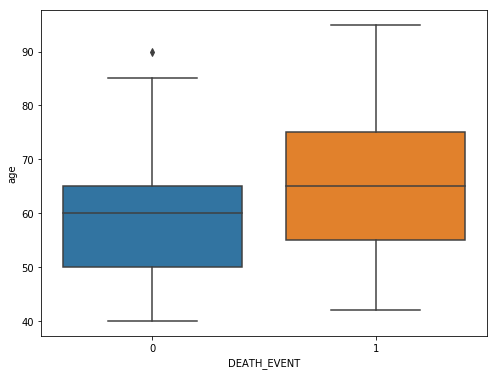

In [71]:
plt.figure(figsize= (8, 6))
sns.boxplot(x = 'DEATH_EVENT', y = 'age', data = df)

In [59]:
df.describe()['age']

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

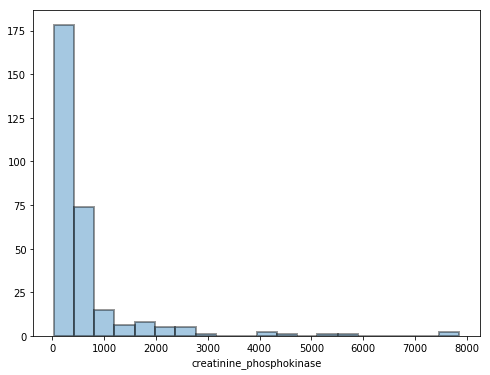

In [72]:
plt.figure(figsize= (8, 6))
sns.distplot(df['creatinine_phosphokinase'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2), kde = False)

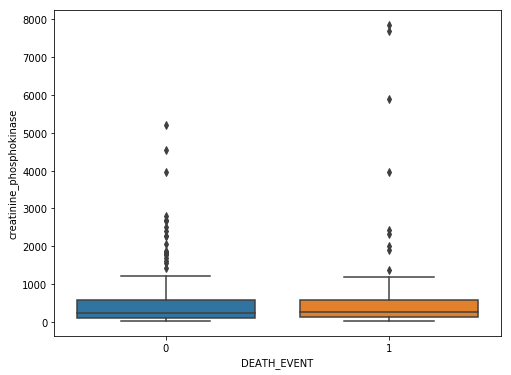

In [74]:
plt.figure(figsize= (8, 6))
sns.boxplot(x = 'DEATH_EVENT', y = 'creatinine_phosphokinase', data = df)

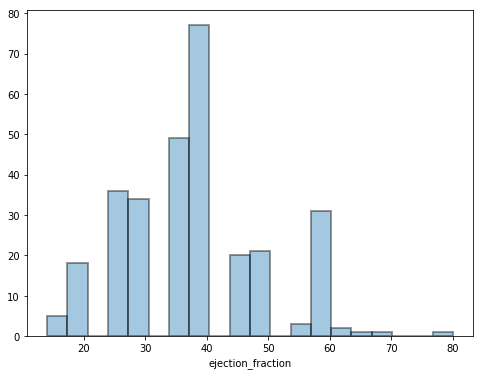

In [75]:
plt.figure(figsize= (8, 6))
sns.distplot(df['ejection_fraction'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2), kde = False)

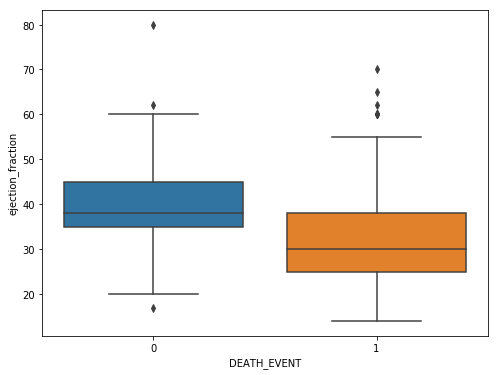

In [76]:
plt.figure(figsize= (8, 6))
sns.boxplot(x = 'DEATH_EVENT', y = 'ejection_fraction', data = df)

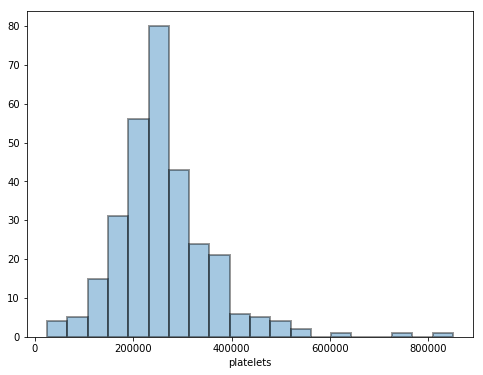

In [77]:
plt.figure(figsize= (8, 6))
sns.distplot(df['platelets'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2), kde = False)

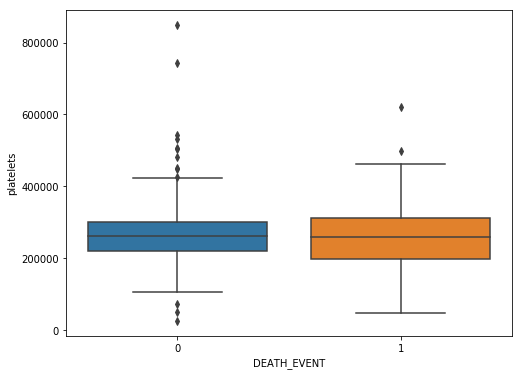

In [78]:
plt.figure(figsize= (8, 6))
sns.boxplot(x = 'DEATH_EVENT', y = 'platelets', data = df)

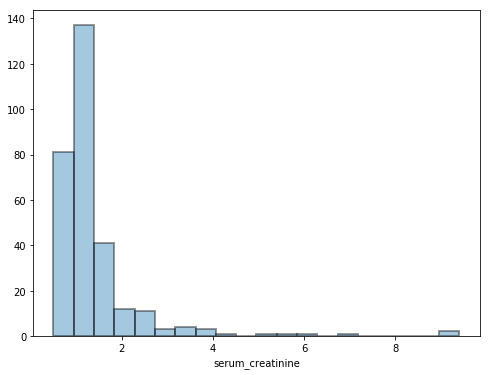

In [79]:
plt.figure(figsize= (8, 6))
sns.distplot(df['serum_creatinine'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2), kde = False)

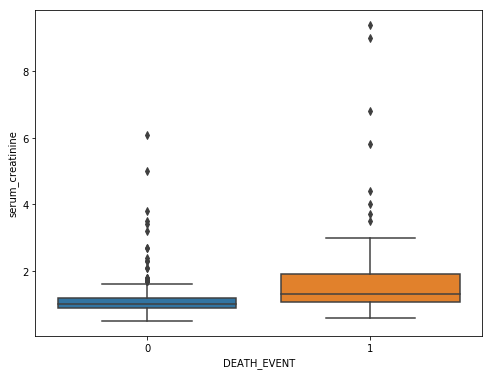

In [81]:
plt.figure(figsize= (8, 6))
sns.boxplot(x = 'DEATH_EVENT', y = 'serum_creatinine', data = df)

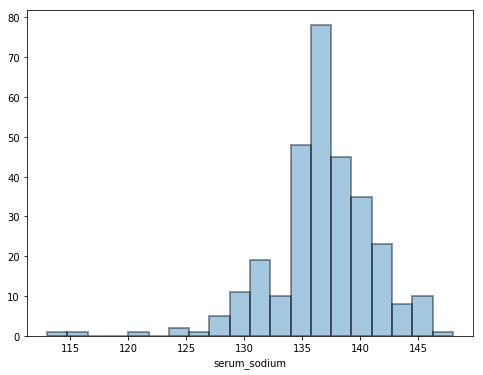

In [69]:
plt.figure(figsize= (8, 6))
sns.distplot(df['serum_sodium'], bins = 20, hist_kws=dict(edgecolor="k", linewidth=2), kde = False)

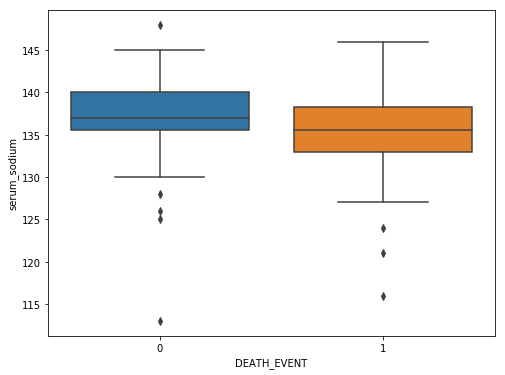

In [82]:
plt.figure(figsize= (8, 6))
sns.boxplot(x = 'DEATH_EVENT', y = 'serum_sodium', data = df)

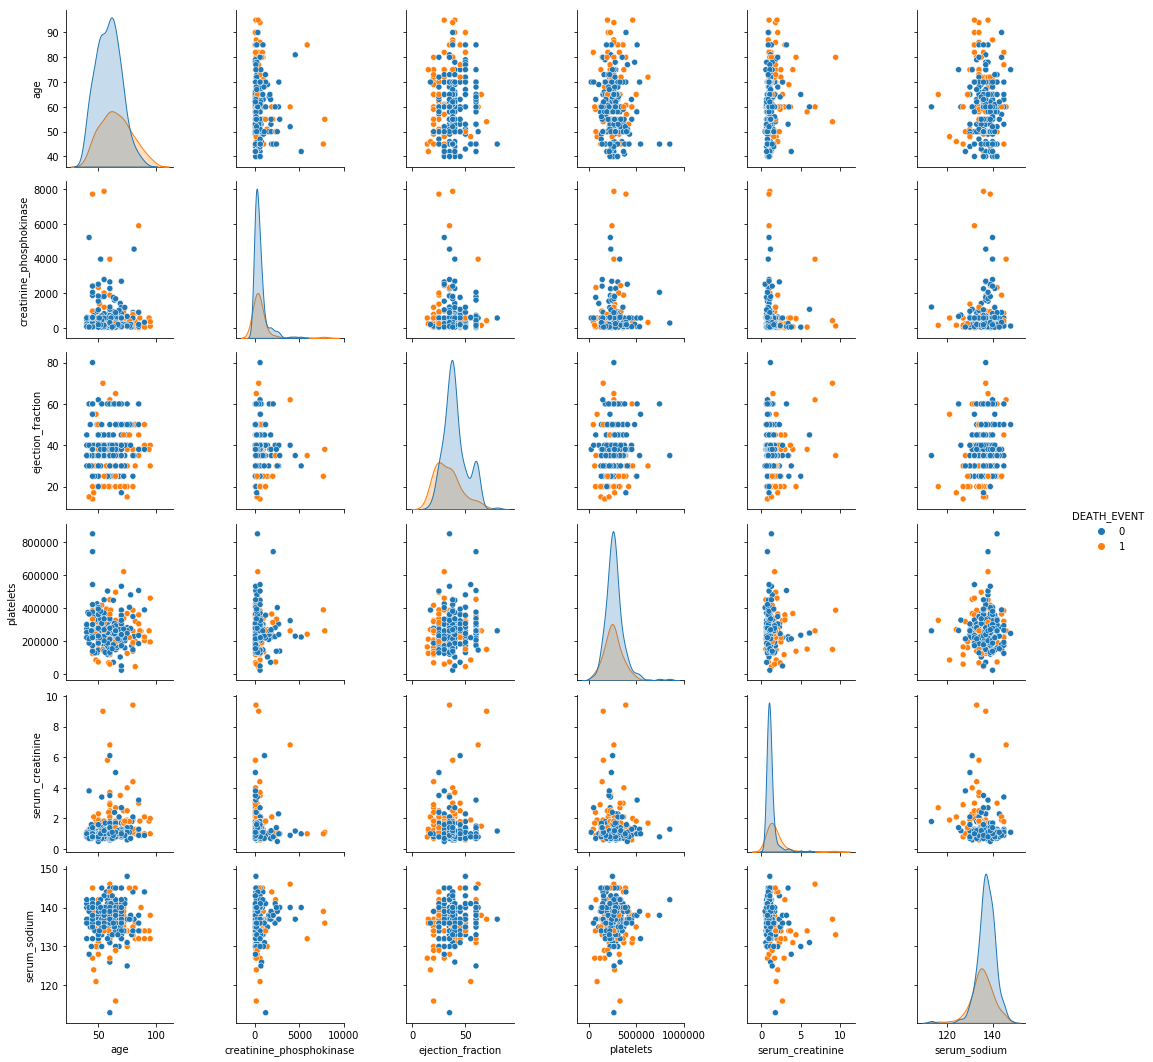

In [95]:
sns.pairplot(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']], hue = 'DEATH_EVENT')

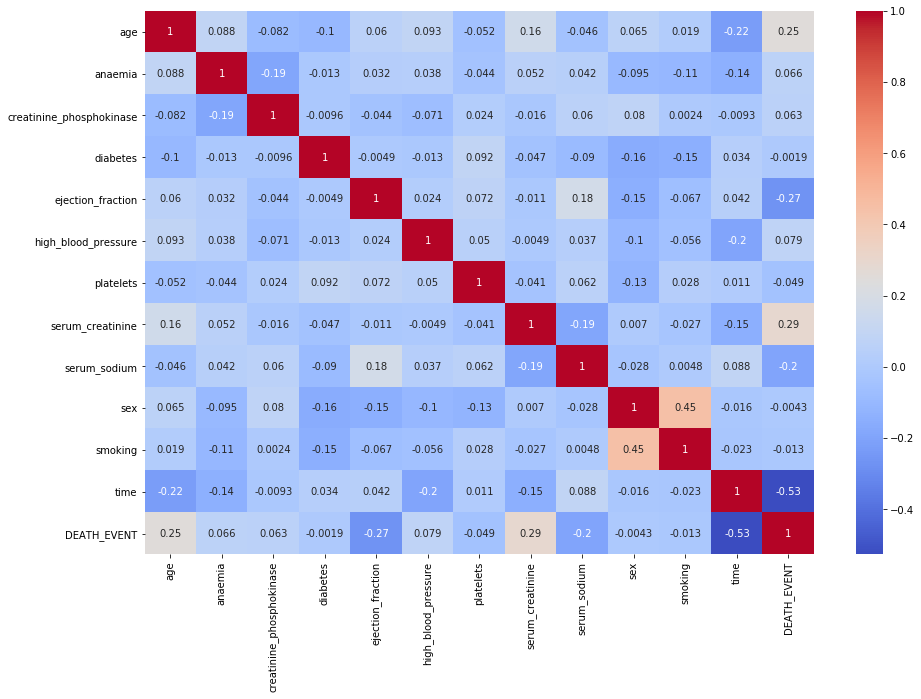

In [106]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)

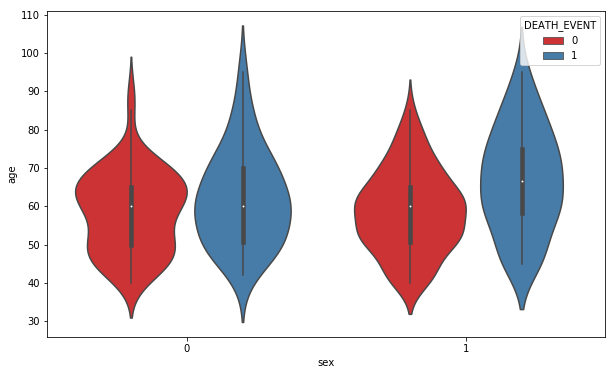

In [103]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'sex', y = 'age', hue = 'DEATH_EVENT', data = df, palette='Set1')

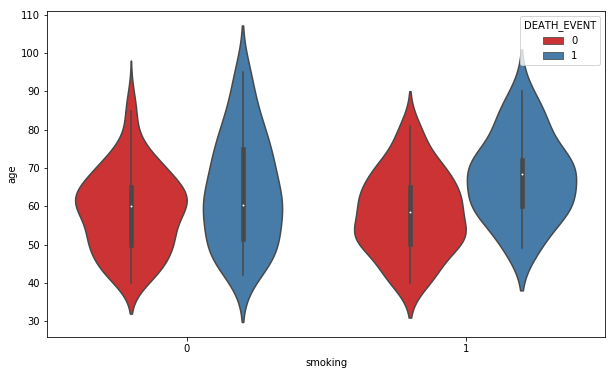

In [104]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'smoking', y = 'age', hue = 'DEATH_EVENT', data = df, palette='Set1', )

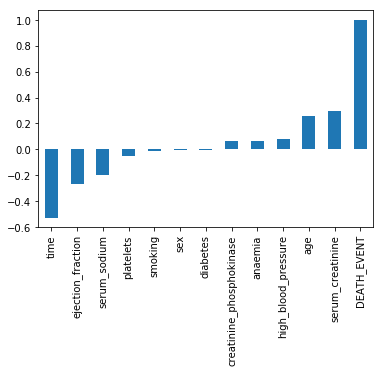

In [107]:

df.corr()["DEATH_EVENT"].sort_values().plot(kind="bar")